# [George McNinch](http://gmcninch.math.tufts.edu) Math 87 - Spring 2025

# Week 7

# Finite-state machines

Finite-state machines
---------------------

In this discussion, we are going to use a form of graph model to represent *states* and transitions between them.

Let's start with a pretty simple example:

Example: a door
---------------

We are going to model exactly two states: *open*, and *shut*.

We represent these states as *nodes* in a directed graph. 

The edges in the directed graph will represent *transitions*: we can *open the door* and we can *shut the door*.

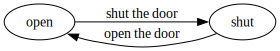

In [1]:
from graphviz import Digraph
door = Digraph()
door.attr(rankdir='LR')
door.node("open")
door.node("shut")
door.edge("shut","open","open the door")
door.edge("open","shut","shut the door")

door

Example; elevator:
------------------

Consider an elevator in a building with two floors.

We'll model two states: *first floor* and *second floor*. These states represent the *current position of the elevator.*

Inside the elevator, there are two buttons: *up* and *down*.

When the elevator is on the first floor, pushing the up button initiates a trip up, but the up button does nothing when the elevator is on the second floor.

Similar remarks hold for the down button. 

We can model these states and transitions using the following diagram:

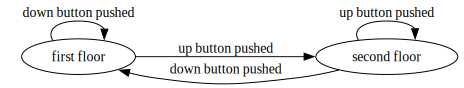

In [2]:
from graphviz import Digraph
elev = Digraph()
elev.attr(rankdir='LR')
elev.node("first floor")
elev.node("second floor")

elev.edge("first floor","second floor","up button pushed")
elev.edge("first floor","first floor","down button pushed")
elev.edge("second floor","first floor","down button pushed")
elev.edge("second floor","second floor","up button pushed")

elev

Definition of finite-state machine
----------------------------------

A **finite state machine** (FSM, also called a finite-state automatata or FSA) is an ordered collection
$(\Sigma,S,s_o,\delta,F)$ where:  
- $\Sigma$ is the "alphabet", a finite and non-empty set of symbols  
- $S$ is a finite, non-empty set of states  
- $s_o \in S$ is an initial state  
- $\delta:S \times \Sigma \to S$ is the state-transition function  
- $F \subset S$ is the set of final states ($F$ is possibly empty). 

Sometimes we may drop the adjective *finite* and consider just a **state machine**; in this case, the
set $S$ of states may be infinite.

Given a finite state machine $M = (\Sigma,S,s_o,\delta,F)$, the symbols in $\Sigma$ represent 
ways in which the state of $M$ may transform:

- If $M$ is in state $s$, then after applying the symbol $x \in \Sigma$, $M$ is in state
  $\delta(s,x)$.

- If $M$ is in state $s$, then we can apply a sequence $x_1,x_2,\dots,x_n$ of symbols in $\Sigma$.
  After applying the sequence, $M$ is in state
  $$\delta(\cdots(\delta(\delta(\delta(s,x_1),x_2),x_3),\dots),x_n)$$

**Remark**: sometimes $\delta$ is permitted to be a *partial* function. Thus, $\delta$ may not be defined for all pairs $(s,x) \in S \times \Sigma$.

Example:
--------

Consider a finite state machine which receives a sequence of characters, and checks whether the string is equal to "ant".

The initial state is "start".

The final states are "received 'ant'" and "didn't receive 'ant'"

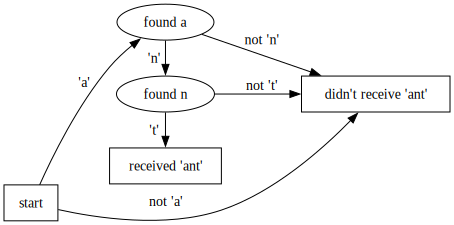

In [3]:
ant = Digraph("ant")
ant.attr(rankdir='LR')

ant.node("start",shape='box')

with ant.subgraph() as c:
    ant.attr(rank='same')
    c.node("found a")
    c.node("found n")
    c.node("received 'ant'",shape='box')

ant.node("didn't receive 'ant'",shape='box')

ant.edge("start","found a","'a'")
ant.edge("start","didn't receive 'ant'","not 'a'")
ant.edge("found a","found n","'n'")
ant.edge("found a","didn't receive 'ant'","not 'n'")
ant.edge("found n","received 'ant'","'t'")
ant.edge("found n","didn't receive 'ant'","not 't'")
ant

Let's identify the components of the finite-state machine in this example:
 
- the alphabet $\Sigma$ is the usual "alphabet" `[a,b,c,...,z]`  
- $S$ is the set of nodes of the diagram above, namely `[ start, found a, found n, received "ant", didn't receive "ant"]`
- `s0 = start`
- the final states are `[ received "ant", didn't receive "ant" ]` 

- the transition function $\delta:S \times \Sigma \to S$ describes how to evolve the state as a letter is processed.

Observe that evolving the state by the characters of any word of length `>= 3` is guaranteed to arrive at one of the final states.

# Probability and transition

Finite state machines provide a useful way of describing systems where the transitions between states
have a probabilistic description.

For example:

## "Drunkard's walk"

This is a so-called random walk. You are given nodes labelled by integers $n \in \mathbb{Z}$.
(so in particular, there are infinitely many nodes!)

For each integer $n$, there is an edge $n \to n+1$ labelled with $p$, and there is an edge
$n \to n-1$ labelled with $1-p$, for some $0 \le p \le 1$

Let's make a partial diagram:

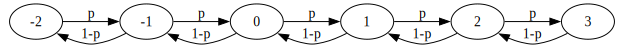

In [4]:
dw = Digraph("dw")
partial = list(range(-2,4))
dw.attr(rankdir='LR')

for n in partial:
    dw.node(f"{n}")
    
for n in partial:
    if n+1 in partial:
        dw.edge(f"{n}",f"{n+1}","p")
        
for n in partial:
    if n-1 in partial:
        dw.edge(f"{n}",f"{n-1}","1-p")
        
dw

This system can be understood as follows: 

- A state represents the position of some object.
- the object undergoes state changes -- "move left" or "move right" -- with respective probabilities `1-p` and `p`
- a standard choice is $p =1/2$; then the state changes `move left` and `move right` happen with equal probabilty

  
As to our formal description of the FSM, in this case we have

- the states are given by the (infinite) set $S = \{ 0, \pm 1, \pm 2, \pm 3, \cdots\}.$
- $\Sigma =$ `[ left, right ]`
- `S0 = starting position`, often we'll take `S0 = 0`
- in this case, there are no distinguished final states; in fact `F = S`

The randomness is involved with the *input* to the finite state machine. 

You can imagine coin tosses determining a sequence of inputs:

`[ left, left, right, left, right, right, right, ... ]`


multi-dimensional version
-------------------------

Of course, the "drunkard's walk" need not just occur in a line!

One might consider states labelled by pairs $(m,n) \in \mathbb{Z} \times \mathbb{Z}$.

Consider edges  
- $(m,n) \to (m+1,n)$   
- $(m,n) \to (m,n+1)$  
- $(m,n) \to (m-1,n)$  
- $(m,n) \to (m,n-1)$

In this case, the object undergoes state changes ("move up", "move right", "move left", "move down") each with probability 1/4.

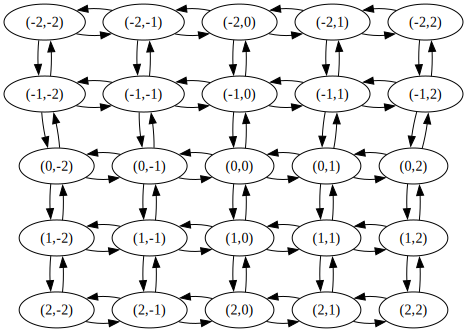

In [5]:
import itertools as it

ddw = Digraph("dw")

p = list(range(-2,3))

pp = list(it.product(p,p))

for m in p:
    with ddw.subgraph() as c:
        c.attr(rank='same')
        for n in p:
            c.node(f"({m},{n})")
            
for (m,n) in pp:
    if (m+1,n) in pp:
        ddw.edge(f"({m},{n})",f"({m+1},{n})")
    if (m,n+1) in pp:
        ddw.edge(f"({m},{n})",f"({m},{n+1})")
    if (m-1,n) in pp:
        ddw.edge(f"({m},{n})",f"({m-1},{n})")
    if (m,n-1) in pp:
        ddw.edge(f"({m},{n})",f"({m},{n-1})")

ddw        

Transition probabilities
-------------------------

We want to track the state of a probabilistic FSM. Let's describe this using our example.

For the (1 dimensional) drunkard's walk, consider the following description:

- at time 0, we begin at state 0.
- at time 1, `M` is at state 1 with .50 probabilty, and we are at state -1 with .50 probability
- at time 2, `M` is at state 2 with .25 probability, at state 0 with .50 probability, and state -2 with .25 probability
- at time 3, `M` is| at state 3 with probability .125, at state 1 with probability .375, at state -1 with probability .375, and state   -3 with probability .125

Here `time` refers to the `number of state transitions`

etc...



Let's describe the probabilities for the 2-dimensional version:

The possible state transitions are `[ u, d, l, r ]` each occuring with probabilty `1/4`

| time | probability | possible states                     |
| ----:| -----------:| --------------------:               | 
|  `0` | `1`         | `[(0,0)]`                           |
|  `1` | `.25`       | `[ (0,1), (0,-1), (-1,0), (1,0) ] ` |

Once we reach time `2`, there is some redundancy in how a state is reached. 

- For example, the transitions `[l, u]` and `[u, l]` both reach the state `(-1,1)`. 

- On the other hand, the only sequence of transitions resulting in `(-2,0)` is `[ l, l ]`, which

- Finally, there are 4 ways of reaching the origin `(0,0)`, namely: `[l,r]`, `[r,l]`, `[u,d]`, `[d,u]`.

Note that there are $4^2 = 16$ possible sequences of transitions. So we see that 
- `(-2,0)` occurs with probability`1/16 = .0625`
- `(-1,1)` occurs with probability `2/16 = .125`
- `(0,0)` occurs with probability `4/16 = .25`

More generally, we have 
| time | probability | possible states |
| ----:| -----------:| ---------------:|
|  `2` | `0.125`     | `[ (-1,1), (-1,-1), (1,-1), (1,1) ]` |
|  `2` | `0.0625`    | `[ (-2,0), (2,0), (0,2), (0,-2) ]` |
|  `2` | `0.25`      | `[ (0,0) ]` |